# Module 2: Data Analysis

## Sprint 3: Statistical Modeling

## Part 5: Red Wine Quality

## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will analyse the Red Wine Quality dataset.
You will have to apply all that you have learned about Machine Learning to complete this task.
Our expectation is that you'll use your own judgement how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills and there will be many projects for you to apply your newly gained skills in the future.
For now just use what you have learned and try your best!

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using linear machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice creating dashboards with Google Data Studio.
- Practice reading data, performing queries and filtering data using SQL and Pandas.

## Requirements

- Download the data from [Red Wine Quality](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
- Load the data using Pandas.
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, checking for correlations and other relations between variables, and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, conducting z or t-tests for these hypotheses.
- Apply linear machine learning models to predict the quality column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Apply linear machine learning models to predict the alcohol column using the other 11 features. This should include the analysis of model selection using the statistical significance of each feature, R-squared, at least one popular information criteria, and other methods.
- Create a Google Data Studio dashboard with at least three different types of charts.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface or did you explored the dataset in depth?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use the suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present it as if talking to a technical team lead and a senior co-worker working in your team.
You can assume that they will have strong data science and software engineering skills - they will understand technical jargon, they are expected to notice things that could have been done better, ask about the choices you've made (especially if you've made some questionable choices).
In addition, be careful not to spend your time explaining trivial concepts or code snippets that are simple - your best bet is to focus your presentation on the more difficult portions of your code.

During a correction, you may get asked questions that test your understanding of covered topics.

- What is multicollinearity? Can you give an example? Why is it important to avoid multicollinearity in linear models?
- What is a confounding variable? Can you give an example?
- What is overfitting? How to detect and reduce overfitting?
- What is the Bayes Theorem? How can we use the Bayes Theorem to estimate the probability of our hypotheses?
- What metrics are typically used for evaluating classification models? What are their use cases?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


#Summary

This report provides an analysis of a red wine dataset with the objective of predicting wine quality and alcohol content based on 11 selected features. The analysis involved correlation analysis, visualizations, and linear regression models.

The results indicated moderate relationships between certain variables, such as fixed acidity with citric acid, fixed acidity with density, pH with fixed acidity, and total sulfur dioxide with free sulfur dioxide. However, the boxplots did not provide clear insights into the relationship between variables and wine quality.

The linear regression model for predicting wine quality accounted for approximately 36.0% of the variation, demonstrating a weak fit with a trade-off between explanatory power and simplicity. Moreover, the multinomial logistic regression model performed poorly, indicating limited effectiveness in capturing the relationship between features and wine quality. However, the linear regression model for alcohol content achieved a stronger association, explaining around 69.1% of the variance, with reliable predictions and a relatively parsimonious structure. To enhance the analysis, further investigation of variable relationships, exploration of alternative modeling techniques, and improvements in data preprocessing and feature selection methods are recommended for a more comprehensive understanding and improved prediction accuracy.

**Importing important Modules**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report

**Loading Red Wine Quality from Google Drive to Google Colab**

In [2]:
! gdown --id 1T0Idk1Cde2O4UHfXujVtaq7zDAqhbEAv

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1T0Idk1Cde2O4UHfXujVtaq7zDAqhbEAv
To: /content/winequality-red.csv
100% 101k/101k [00:00<00:00, 67.4MB/s]


###Overview of the Data

In [3]:
df = pd.read_csv("/content/winequality-red.csv",index_col=False)

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


###Check if there are any missing values and dublicates in the DataFrame

In [7]:
print(f" There are {int(df.isnull().any().any())} missing values")
print(f"There are {df.duplicated().sum()} duplicates.")


 There are 0 missing values
There are 240 duplicates.


In [8]:
unique_rows = df.drop_duplicates()
num_unique_rows = len(unique_rows)
print("Number of unique rows:", num_unique_rows)

Number of unique rows: 1359


*At this point, it is very difficult to conclude that the duplicate rows are either were written many times or they were actual data collected. It should have been recorded with id to differenciate among the captured data.*

###Outliers

In [9]:
z = np.abs(stats.zscore(df))
outliers = df[(z > 3).all(axis=1)]

In [10]:
len(outliers)

0

##Exploratory Data Analysis

Let’s first start to perform EDA which will allows us to understand the nature of our data, to check the assumptions that we have made, and frame our analytical approach. The investigations that are planned to be carried out are listed below:

* What does the distribution of the numerical variables looks like?
* Is there correlation between the different variables?
* Since quality is the response variable, it is important to check how the other variable affects it.



###Distribution of the dataset

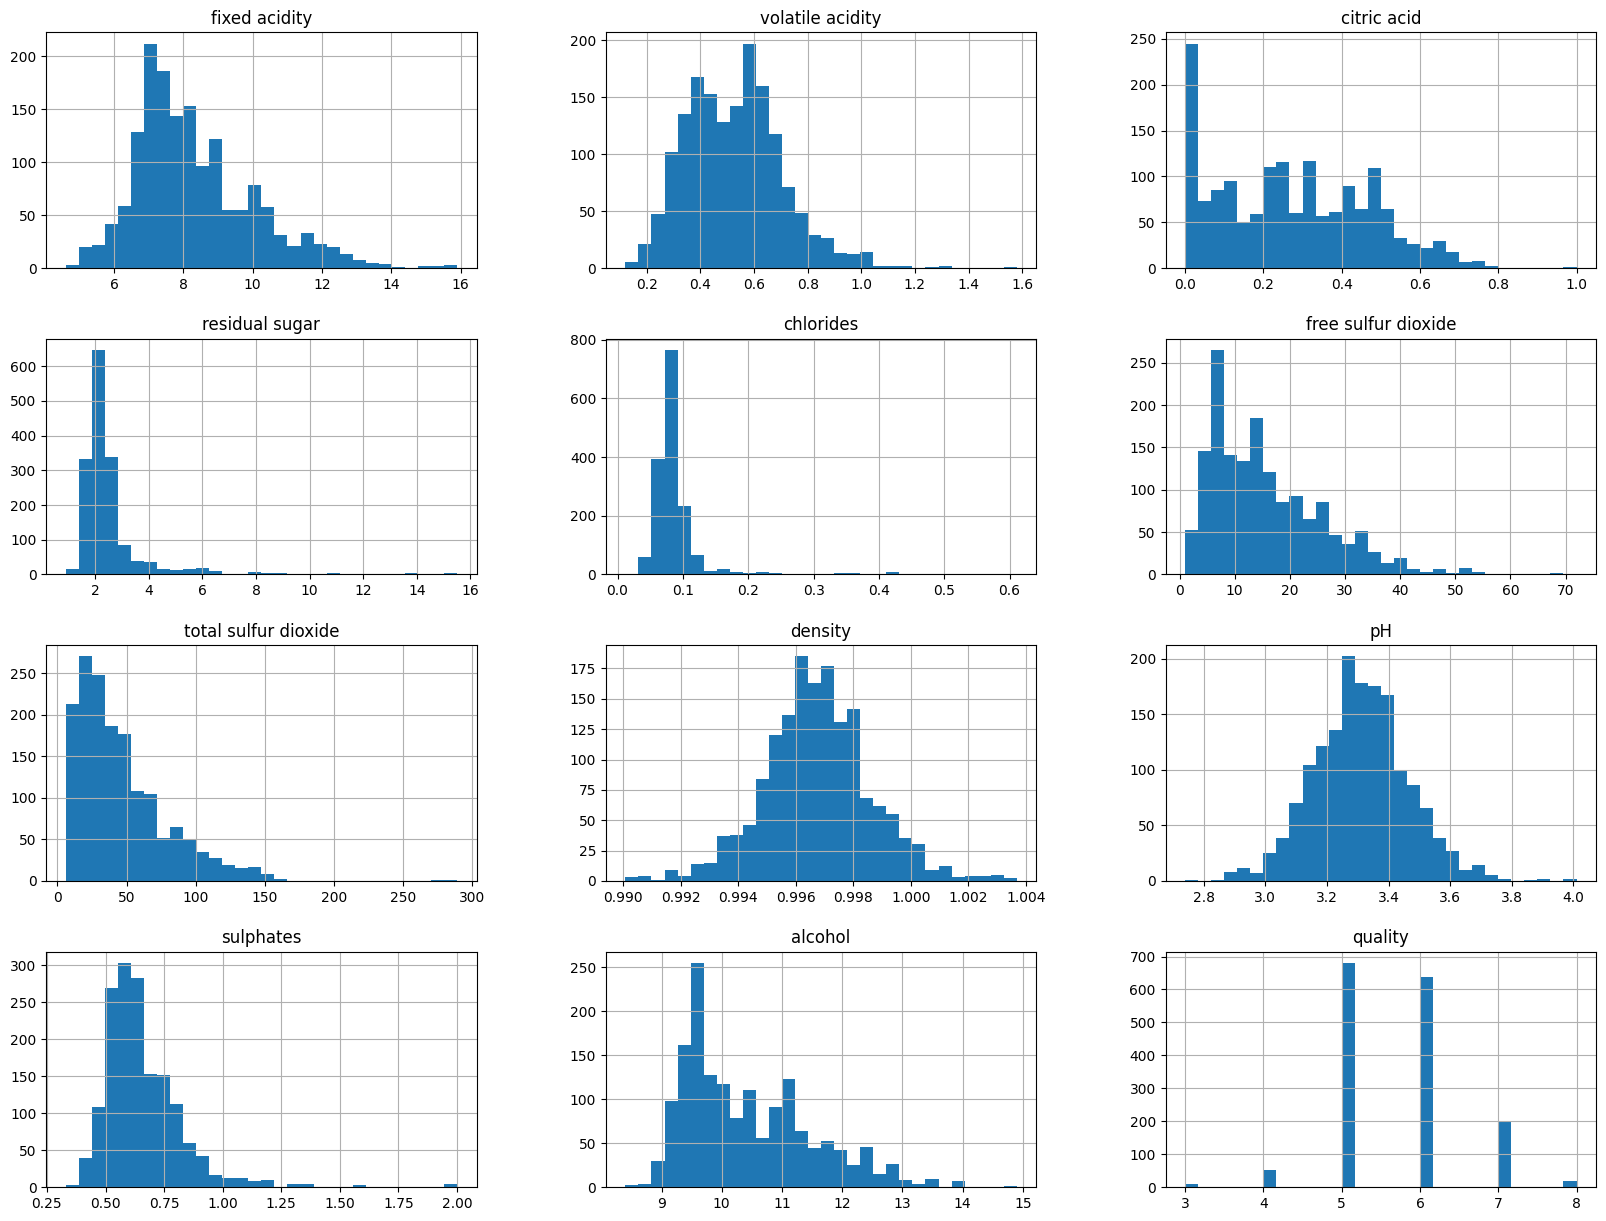

In [11]:
df.hist(bins=30, figsize=(20,15))
plt.show()

*Based on the distribution plots above, it can be observed that the variables fixed acidity, volatile acidity, density, pH, and sulphates exhibit a bell-shaped curve, indicating a relatively symmetrical distribution of data. On the other hand, the variables residual sugar, chlorides, free sulfur dioxide, and total sulfur dioxide demonstrate a right-skewed distribution, indicating a longer tail towards higher values.*

###Correlation between the different variables

In order to understand our data set, it is important to create the correlation matrix to see if there is any corrolation between the different variables. However, since the "quality" variable is the result of the other variables, we can drop this column.

             Variable 1            Variable 2  Correlation
0         fixed acidity           citric acid     0.671703
1         fixed acidity               density     0.668047
2           citric acid         fixed acidity     0.671703
3               density         fixed acidity     0.668047
4                    pH         fixed acidity    -0.682978
5  total sulfur dioxide   free sulfur dioxide     0.667666
6         fixed acidity                    pH    -0.682978
7   free sulfur dioxide  total sulfur dioxide     0.667666


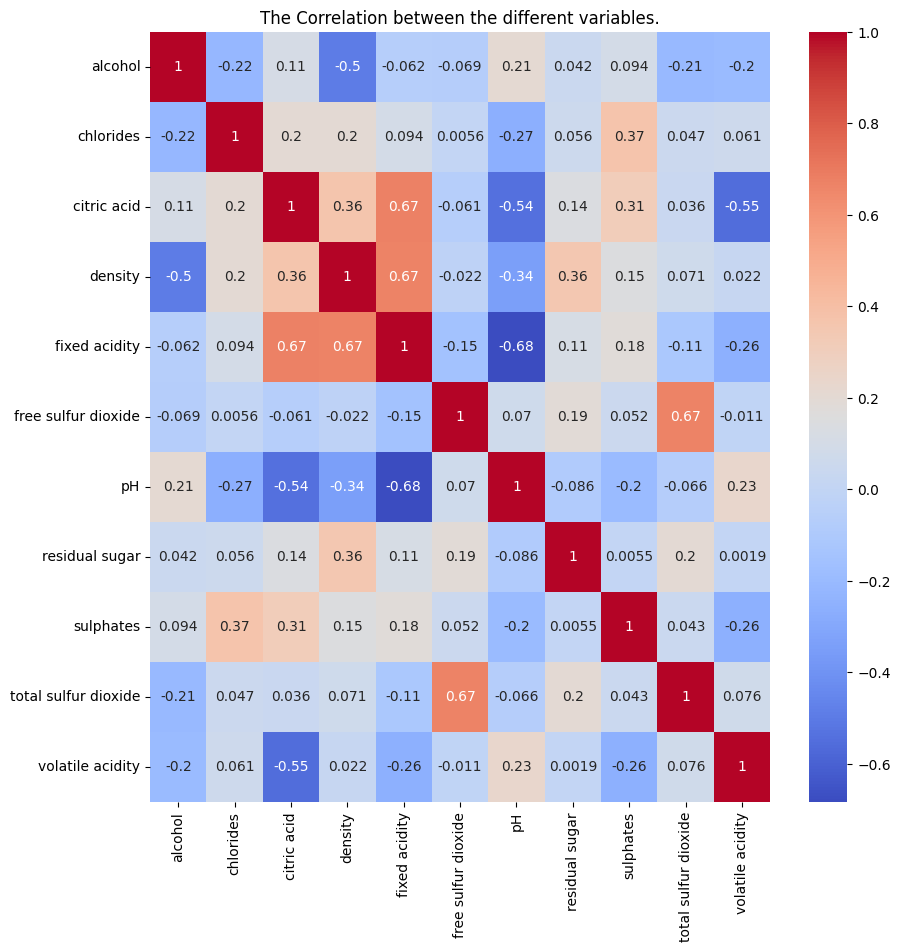

In [12]:
columns_to_use = df.columns.difference(['quality'])
df_mode1 = df[columns_to_use]

fig, ax2 = plt.subplots(figsize=(10, 10))
correlation_matrix = df_mode1.corr()

ax2 = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
ax2.set_title("The Correlation between the different variables.")

high_corr = pd.DataFrame()

for column in correlation_matrix.columns:
    for index in correlation_matrix.index:
        if abs(correlation_matrix.loc[index, column]) > 0.6 and index != column:
            high_corr = pd.concat([high_corr, pd.DataFrame({'Variable 1': [index], 'Variable 2': [column], 'Correlation': [correlation_matrix.loc[index, column]]})], ignore_index=True)

print(high_corr);

The above correlation heatmap and the result from correlation matrix shows that fixed acidity with citric acid, fixed acidity with density, pH with fixed acidity and lastly total sulfur dioxide with free sulfur dioxide have have moderate relationship.

###The Pairwise relationship between the different variables

Text(0.5, 0.98, 'The Pairwise relation between the different variables.')

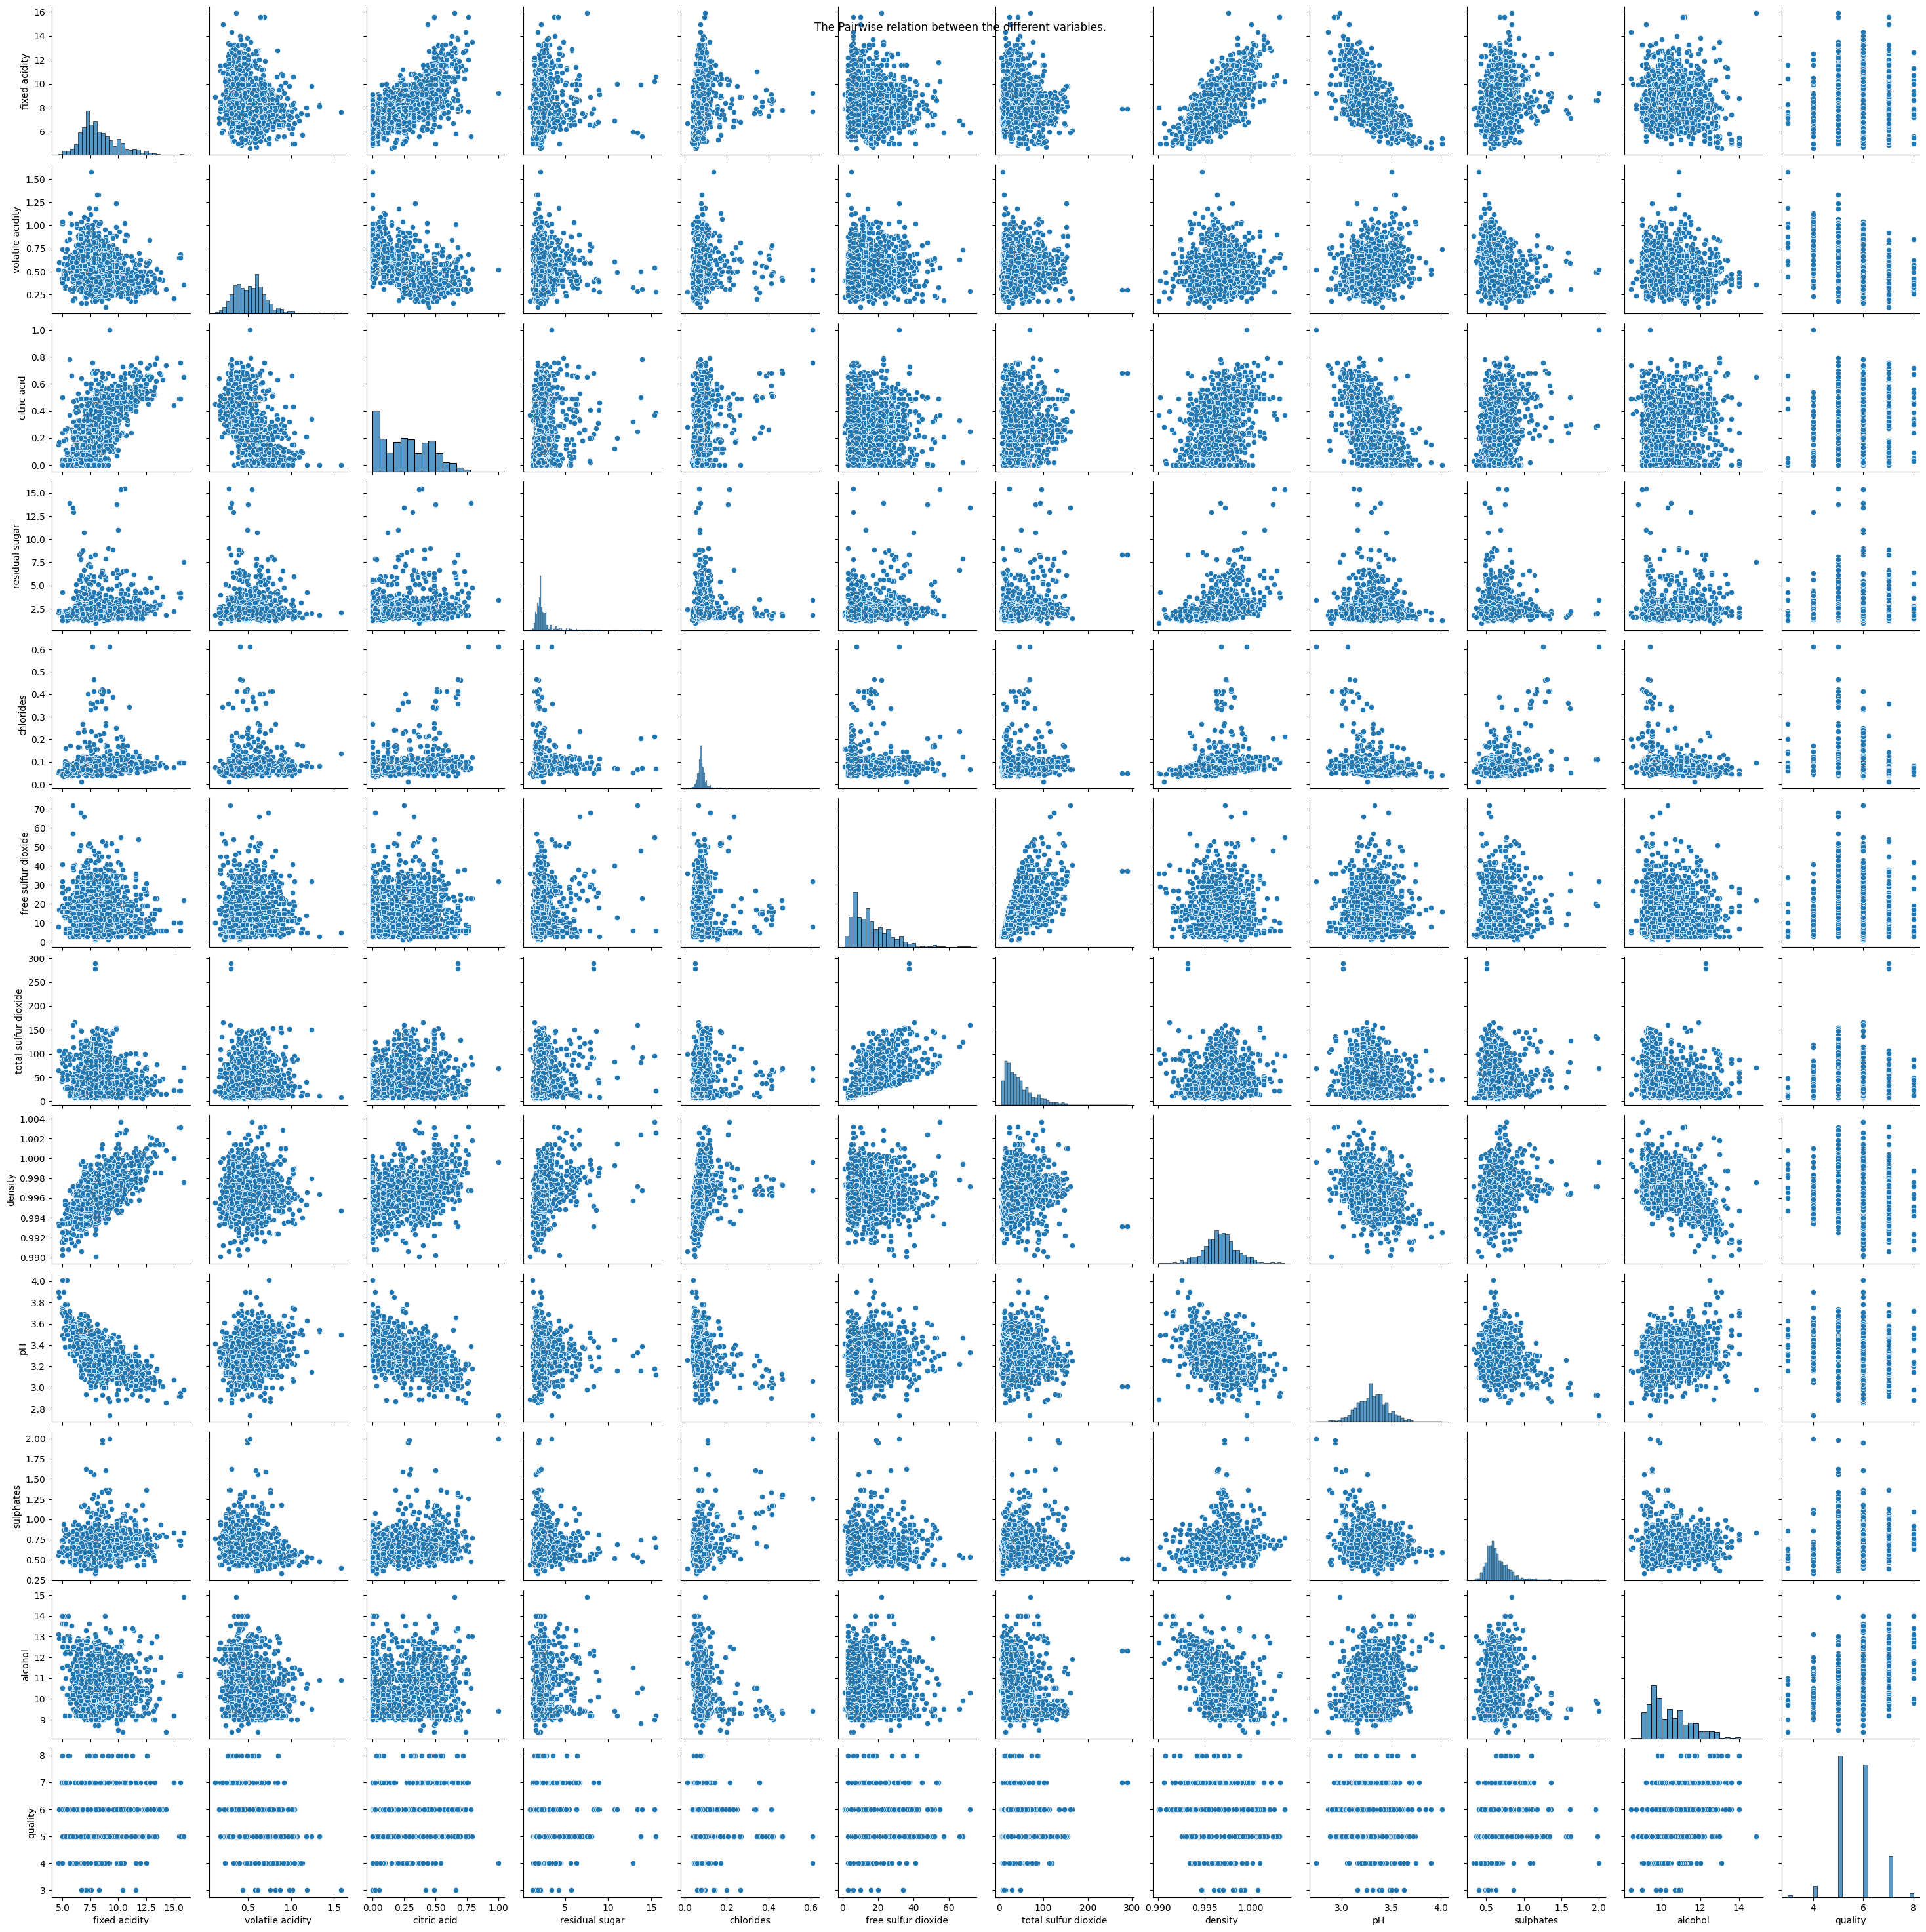

In [13]:
ax3=sns.pairplot(df)
ax3.fig.suptitle("The Pairwise relation between the different variables.")


The moderate relationship of fixed acidity with citric acid, fixed acidity with density, pH with fixed acidity and lastly total sulfur dioxide with free sulfur dioxide can clearly be shown in the above pair wise plot.

###The distribution of different variables grouped by quality

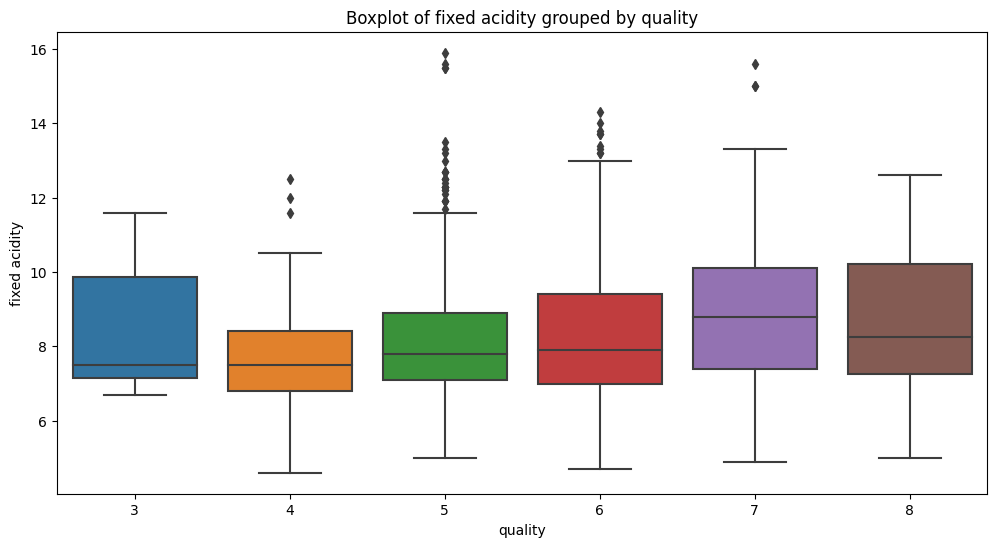

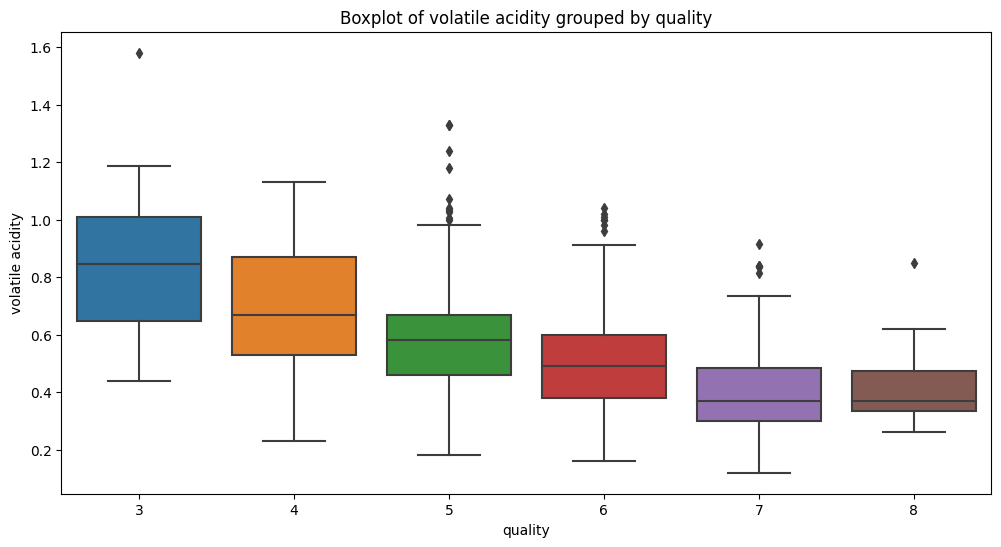

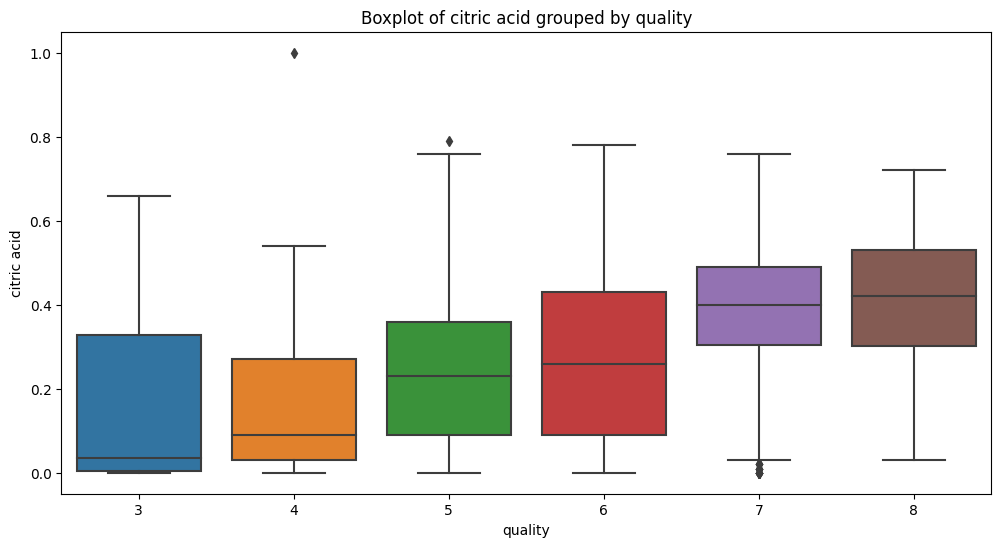

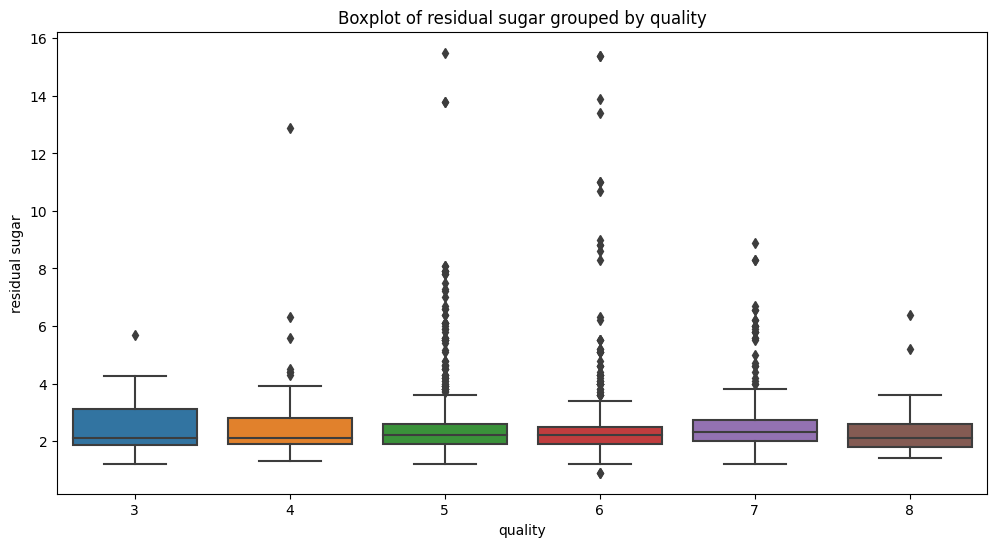

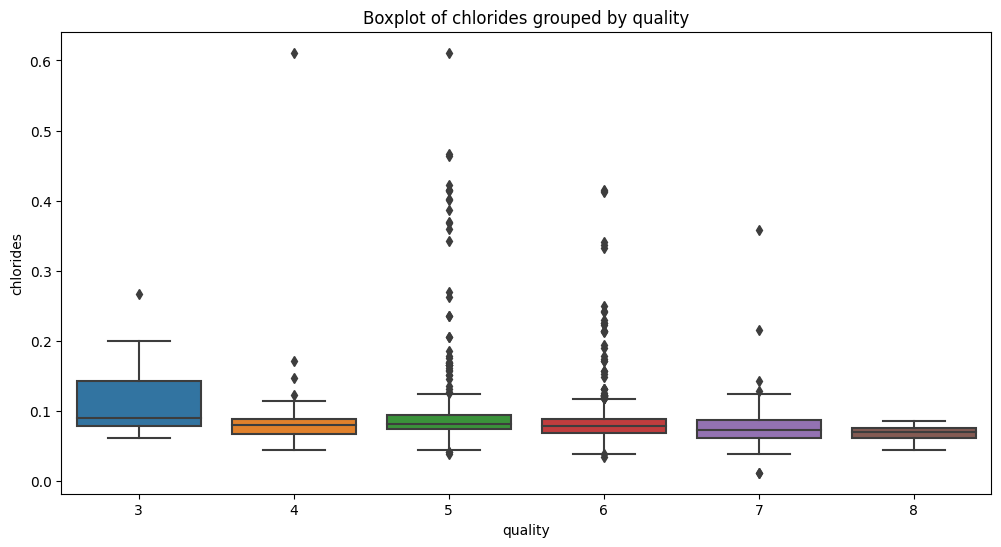

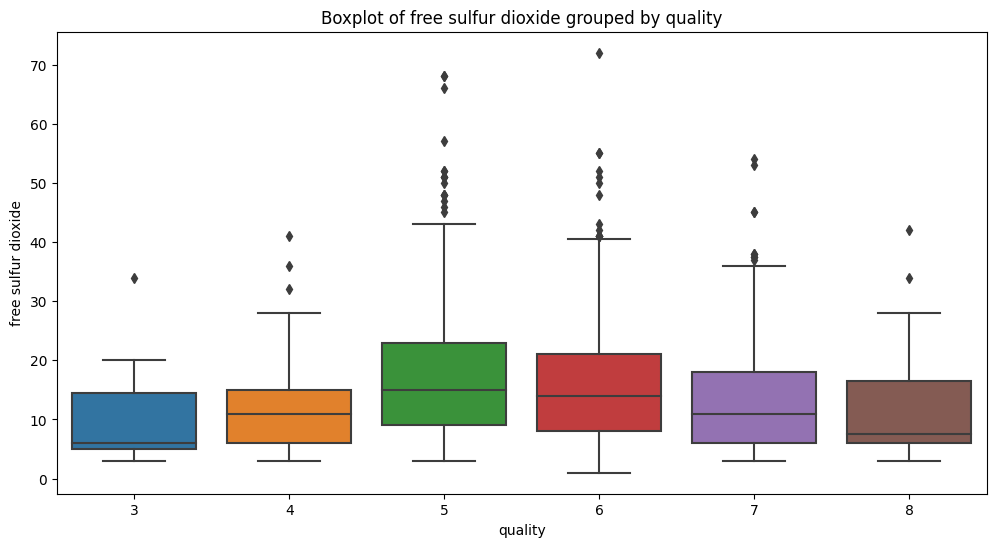

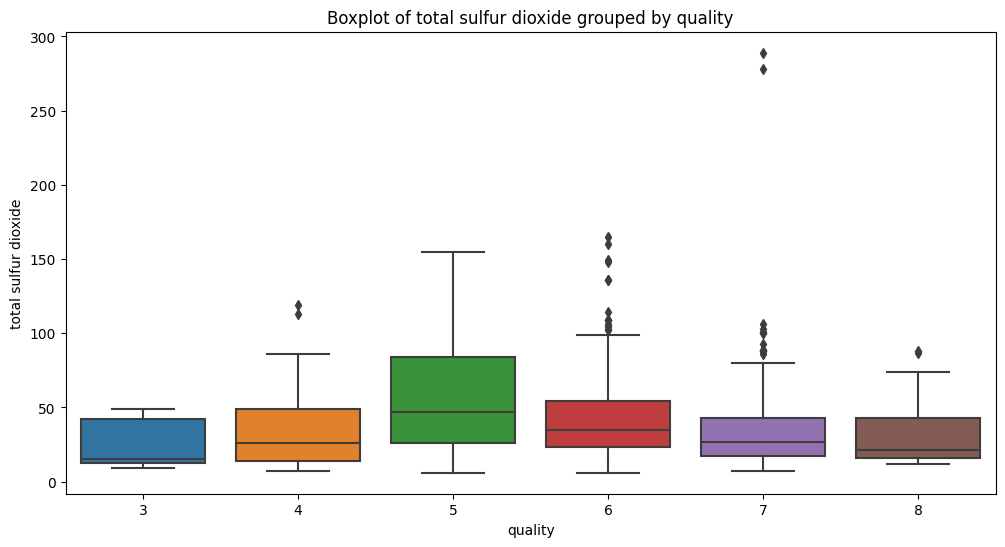

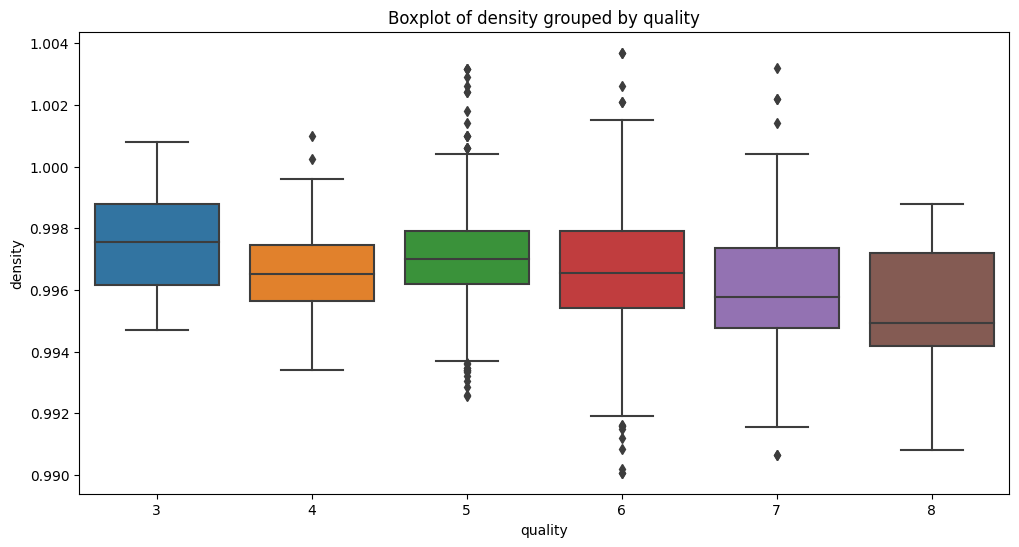

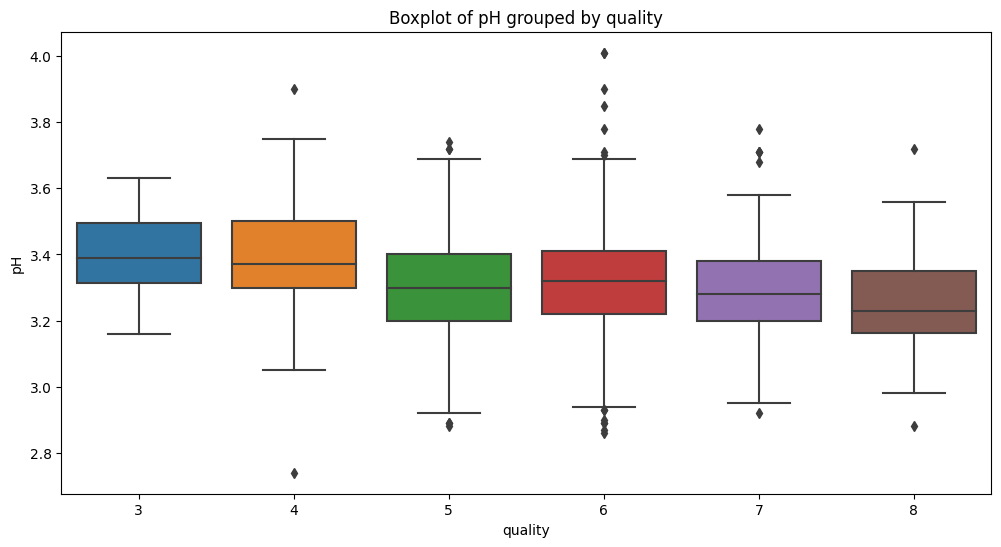

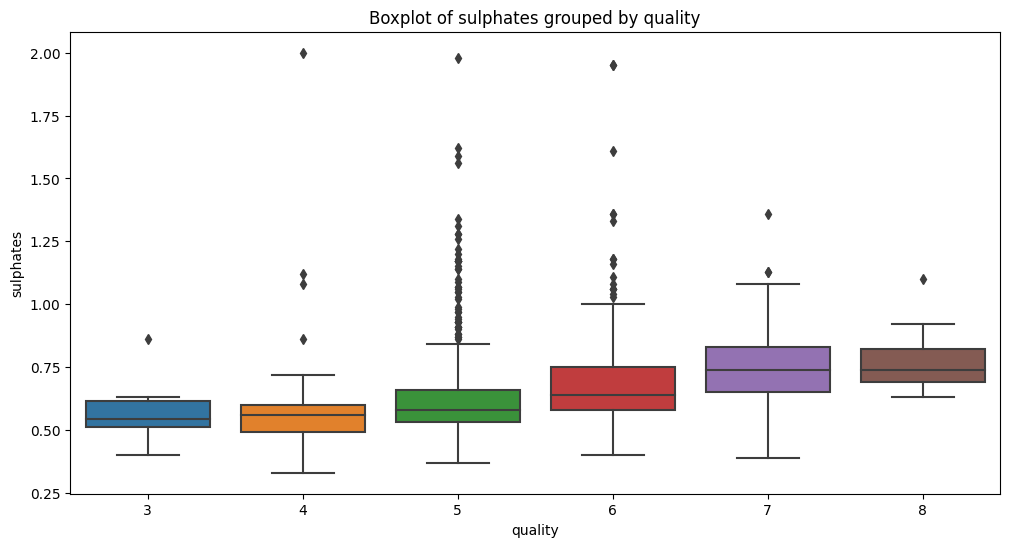

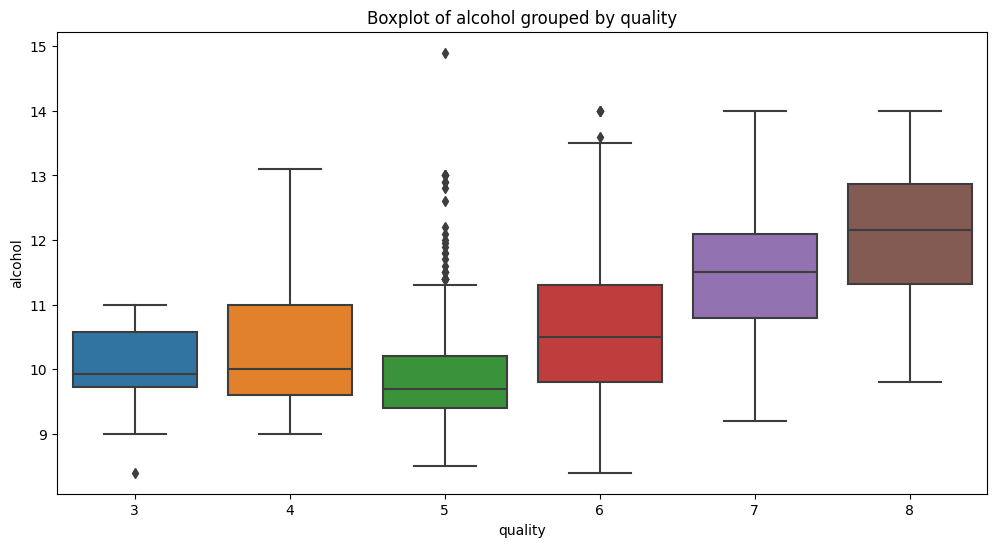

In [14]:
for column in df.columns[:-1]:  # exclude 'quality'
    plt.figure(figsize=(12, 6))
    ax4= sns.boxplot(x='quality', y=column, data=df)
    plt.title(f'Boxplot of {column} grouped by quality')
    plt.show()

From the plots of the boxplot in the above result, it is very difficult to conclude which different value of the different variable make up the highest qaulity of the red wine.

##Statistical inference

Given the data we have and the statement that a wine with a quality greater than 6.5 is considered good, let's perform a detailed statistical inference. The target population is all types of wines from which our dataset has been sampled. This could be all types of red wines, all wines from a certain region, or all wines in general.

The quality of our red wine is of two groups: good and bad red wine. Based on this, there are many hypotheses that we could test. Let's form a few to guide your testing:

* H0: There is no difference in the mean of the variable between good and bad wines.

* H1: There is a difference in the mean of the variable between good and bad wines.

In addition, let's set our significance level to 5% and our confidence interval to 95%.

In [15]:
df['wine_quality'] = df['quality'].apply(lambda q: 'good' if q > 6.5 else 'bad')

# Variables to perform t-tests on
variables = ["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide",
             "total sulfur dioxide","density","pH","sulphates","alcohol","quality"]

for var in variables:
    good_wines = df[df['wine_quality'] == 'good'][var]
    bad_wines = df[df['wine_quality'] == 'bad'][var]

    good_wine_mean = good_wines.mean()
    bad_wine_mean = bad_wines.mean()


    # t-test
    t_stat, p_val = stats.ttest_ind(good_wines, bad_wines)
    print(f"For {var}, t-statistic: {t_stat}, p-value: {p_val}")

    # confidence intervals
    confidence_interval_good = stats.norm.interval(0.95, loc=good_wine_mean, scale=stats.sem(good_wines))
    confidence_interval_bad = stats.norm.interval(0.95, loc=bad_wine_mean, scale=stats.sem(bad_wines))

    print(f"mean {var} for good wines is {good_wine_mean}")
    print(f"mean {var} for bad wines is {bad_wine_mean}")
    print(f"95% confidence interval for good wines' {var}: {confidence_interval_good}")
    print(f"95% confidence interval for bad wines' {var}: {confidence_interval_bad}")
    if p_val <0.5:
      print(f"The Null hypothesis (H0) that there is no difference in the mean {var} between good")
      print(f"and bad wines is rejected and We acceept the alternative hyptothesis (H1)\n")
    else:
      print(f"We fail to reject the Null hypothesis (H0) that there is no difference in the mean")
      print(f"{var} between good and bad wines\n")

For fixed acidity, t-statistic: 4.8328960963052, p-value: 1.4748688383383466e-06
mean fixed acidity for good wines is 8.847004608294931
mean fixed acidity for bad wines is 8.23683068017366
95% confidence interval for good wines' fixed acidity: (8.580905553361534, 9.113103663228328)
95% confidence interval for bad wines' fixed acidity: (8.148113534155469, 8.325547826191853)
The Null hypothesis (H0) that there is no difference in the mean fixed acidity between good
and bad wines is rejected and We acceept the alternative hyptothesis (H1)

For volatile acidity, t-statistic: -11.237923111478523, p-value: 2.9578633809350365e-28
mean volatile acidity for good wines is 0.4055299539170507
mean volatile acidity for bad wines is 0.5470224312590448
95% confidence interval for good wines' volatile acidity: (0.38624251763687656, 0.42481739019722486)
95% confidence interval for bad wines' volatile acidity: (0.5377255461185784, 0.5563193163995113)
The Null hypothesis (H0) that there is no difference 

###Linear Regression on Predicting the quality of Red Wine

In this analysis, we aim to predict the "quality" column based on the other 11 features using linear machine learning models. Our goal is to explore the model selection process by assessing the statistical significance of each feature, evaluating the R-squared value and examining popular information criteria.

In [16]:
features = df.columns.tolist()
for var in ["quality", 'wine_quality']:
    features.remove(var)


while len(features) > 0:
    final_features = df[features]
    target_variable = df["quality"]

    model = sm.OLS(target_variable, final_features)
    result = model.fit()

    p_values = result.pvalues

    max_p_value = p_values.idxmax()

    if p_values[max_p_value] > 0.05:
        features.remove(max_p_value)
    else:
        break
print(features)
print(result.summary())
final_features = df[features]
target_variable = df["quality"]

model = LinearRegression()

result = model.fit(final_features, target_variable)

target_predicted = result.predict(final_features)

r2 = r2_score(target_variable, target_predicted)
print("R-squared:", r2)

n = len(target_variable)
aic = n * np.log(sum((target_variable - target_predicted) ** 2) / n) + 2 * (len(features) + 1)

bic = n * np.log(sum((target_variable - target_predicted) ** 2) / n) + (len(features) + 1) * np.log(n)

print("Akaike Information Criterion:", aic)
print("Bayesian Information Criterion:", bic)

['volatile acidity', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.524e+04
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                        0.00
Time:                        09:28:16   Log-Likelihood:                         -1570.7
No. Observations:                1599   AIC:                                      3157.
Df Residuals:                    1591   BIC:                                      3200.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                 

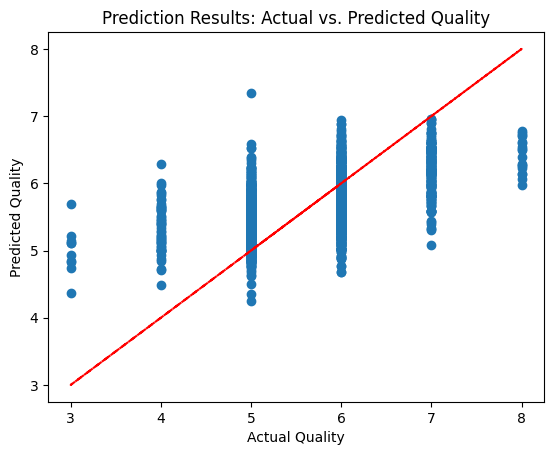

In [17]:
plt.scatter(target_variable, target_predicted)
plt.plot(target_variable, target_variable, color='red', linestyle='--')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')
plt.title('Prediction Results: Actual vs. Predicted Quality')
plt.show()

*In the linear model that was used in the analysis above, to predict the "quality" column from the other 11 characteristics, the selected features may account for about 36.0% of the variation in the "quality" column, according to the model's R-squared value of 0.360. The model's complexity and quality of fit were evaluated using the AIC value of -1378.862 and BIC value of -1330.468 which shows a stronger fit and a trade-off between explanatory power and simplicity are shown by lower AIC and BIC values.*

##Logistic Regression on Predicting the quality of Red Wine

In this analysis, we aim to predict the "quality" column based on the other 11 features using logistic machine learning models. Our objective is to explore the model selection process by assessing the statistical significance of each feature, evaluating the performance metrics such as accuracy,utilizing popular information criteria and compare if this analysis deliver a better fitting model than the one we got from the linear model.

In [18]:
features = df.columns.tolist()
for var in ["quality", "wine_quality"]:
    features.remove(var)

final_features = df[features]
target_variable = df["quality"]

target_variable_categorical = pd.Categorical(target_variable)

In [19]:
model = sm.MNLogit(target_variable_categorical, final_features)
result = model.fit()

print(features)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.916837
         Iterations 10
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
                          MNLogit Regression Results                          
Dep. Variable:                      y   No. Observations:                 1599
Model:                        MNLogit   Df Residuals:                     1544
Method:                           MLE   Df Model:                           50
Date:                Thu, 20 Jul 2023   Pseudo R-squ.:                  0.2261
Time:                        09:28:17   Log-Likelihood:                -1466.0
converged:                       True   LL-Null:                       -1894.2
Covariance Type:            nonrobust   LLR p-value:                2.665e-147
                 y=4       coef    std err          z      P>|z|      [0.025      0.975]
----

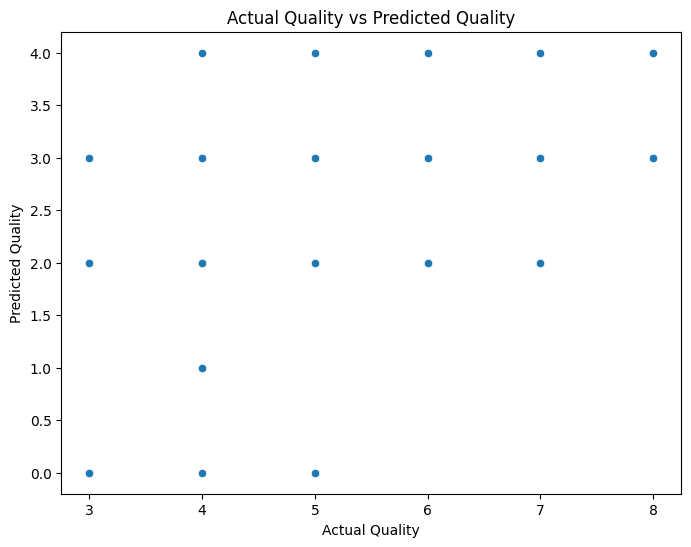

In [20]:
target_predicted = result.predict(final_features)


results_df = pd.DataFrame({"Actual Quality": target_variable_categorical, "Predicted Quality": target_predicted.idxmax(axis=1)})


plt.figure(figsize=(8, 6))
sns.scatterplot(data=results_df, x="Actual Quality", y="Predicted Quality")
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Actual Quality vs Predicted Quality")
plt.show()

In [21]:
accuracy = (target_variable_categorical == target_predicted.idxmax(axis=1)).mean()
print("Accuracy:", accuracy)


n = len(target_variable_categorical)
llf = result.llf
aic = -2 * llf + 2 * (len(features) + 1)
bic = -2 * llf + (len(features) + 1) * np.log(n)

print("Akaike Information Criterion:", aic)
print("Bayesian Information Criterion:", bic)

Accuracy: 0.0012507817385866166
Akaike Information Criterion: 2956.044772779501
Bayesian Information Criterion: 3020.570377333508


*In the provided analysis above, the multinomial logistic regression model used to predict the quality of wines based on the selected features, show an accuracy of approximately 0.001. This accuracy is very low at approximately and indicates that the model has poor predictive performance and does not effectively capture the relationship between the features and the quality categories. Moreover, the AIC value of 2956.04 and the BIC value of 3020.57 suggest that the model has a relatively high level of complexity and may not provide a good fit to the data.*

###Linear Regression on Predicting the alcohol of Red Wine

In this analysis, we aim to predict the "alcohol" column based on the other 11 features using linear machine learning models. Our goal is to explore the model selection process by assessing the statistical significance of each feature, evaluating the R-squared value and examining popular information criteria.

In [22]:
features = df.columns.tolist()
for var in ["alcohol", 'wine_quality']:
    features.remove(var)

while len(features) > 0:
    final_features = df[features]
    target_variable = df["alcohol"]

    model = sm.OLS(target_variable, final_features)
    result = model.fit()

    p_values = result.pvalues

    max_p_value = p_values.idxmax()

    if p_values[max_p_value] > 0.05:
        features.remove(max_p_value)
    else:
        break
print(features)
print(result.summary())
final_features = df[features]
target_variable = df["alcohol"]

model = LinearRegression()

result = model.fit(final_features, target_variable)

target_predicted = result.predict(final_features)

r2 = r2_score(target_variable, target_predicted)
print("R-squared:", r2)

n = len(target_variable)
aic = n * np.log(sum((target_variable - target_predicted) ** 2) / n) + 2 * (len(features) + 1)

bic = n * np.log(sum((target_variable - target_predicted) ** 2) / n) + (len(features) + 1) * np.log(n)

print("AIC:", aic)
print("BIC:", bic)

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']
                                 OLS Regression Results                                
Dep. Variable:                alcohol   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                          2.327e+04
Date:                Thu, 20 Jul 2023   Prob (F-statistic):                        0.00
Time:                        09:28:18   Log-Likelihood:                         -2032.8
No. Observations:                1599   AIC:                                      4086.
Df Residuals:                    1589   BIC:                                      4139.
Df Model:                          10                                                  
Covariance Type:            nonrobust                      

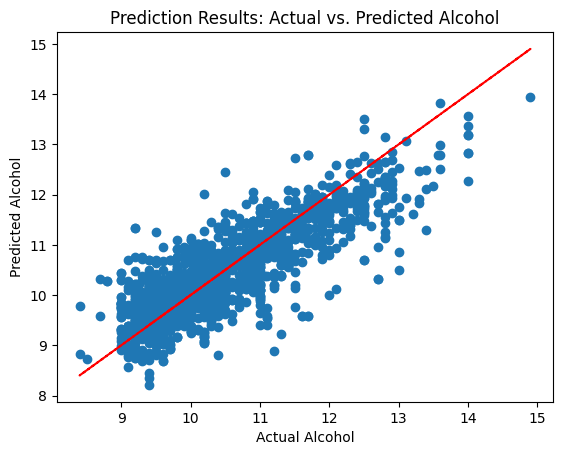

In [23]:
plt.scatter(target_variable, target_predicted)
plt.plot(target_variable, target_variable, color='red', linestyle='--')
plt.xlabel('Actual Alcohol')
plt.ylabel('Predicted Alcohol')
plt.title('Prediction Results: Actual vs. Predicted Alcohol')
plt.show()

*Based on the other 11 variables, the linear model that shows that the selected features may account for about 69.1% of the variance in the "alcohol" column, according to the model's R-squared value of 0.691. This suggests that the predictors and the target variable have a comparatively strong association. Moreover, from the analysis, the AIC value of -1652.489 and BIC value of -1593.341 which were calculated suggest a better fit and a balance between simplicity and explanatory power. These results indicate that the linear model provides a good fit for predicting the "alcohol" column using the other 11 features, with a substantial portion of the variability captured and a relatively parsimonious model.*

##Analysis using Google Studio

In the below link, three different charts are shown. And these are:
1. The distribution of quality on the different level of alcohol
2. The distribution of quality on the different level of residual sugar
3. The different percentage of the different levels of quality.

https://lookerstudio.google.com/s/lelJ_kHVH6g

##Conclusion


In conclusion, the analysis of the dataset revealed moderate relationships between certain variables, such as fixed acidity with citric acid, fixed acidity with density, pH with fixed acidity, and total sulfur dioxide with free sulfur dioxide. However, the boxplots did not provide clear insights into the relationship between variables and the quality of red wine.

The linear model used to predict the quality column accounted for approximately 36.0% of the variation in quality, with a reasonable fit indicated by the AIC and BIC values. However, the multinomial logistic regression model performed poorly, with low accuracy and high AIC and BIC values, suggesting limited predictive performance.

In contrast, the linear model employed to predict the alcohol column demonstrated a stronger association, explaining about 69.1% of the variance. The model exhibited a good fit and a balance between simplicity and explanatory power, as indicated by the AIC and BIC values. Overall, the linear model provided reliable predictions of alcohol content based on the selected features, capturing a substantial portion of the variability.

##Further Research

In order to improve the above result, the following can be taken into consideration:

* Further investigate relationships: Conduct a more detailed exploration of the relationships between variables, using additional visualizations and statistical measures to gain a deeper understanding of their associations.

* Explore alternative modeling techniques: Due to the poor performance of the linear and multinomial logistic regression model for predicting wine quality, consider exploring alternative models.

Implementing these suggestions will help refine the analysis, improve model performance, and enhance the accuracy and interpretability of the predictions.